
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E02_sklearn.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Scikit-learn exercises 

---
These are introductory exercises in Machine learning with focus in **scikit-learn** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

&nbsp; c) Make some plots on some of the columns that you find interesting.

&nbsp; d) Check if there are any columns you might want to drop. 

<details>

<summary>Answer</summary>

a) I have chosen to drop the rows, but it doesn't neccessary have to be the best method. Maybe some NaNs should be filled somehow?

b)
|      |      mpg |   cylinders |   displacement |   horsepower |   weight |   acceleration |
|:-----|---------:|------------:|---------------:|-------------:|---------:|---------------:|
| mean | 23.4459  |     5.47194 |        194.412 |     104.469  | 2977.58  |       15.5413  |
| std  |  7.80501 |     1.70578 |        104.644 |      38.4912 |  849.403 |        2.75886 |
| min  |  9       |     3       |         68     |      46      | 1613     |        8       |
| 25%  | 17       |     4       |        105     |      75      | 2225.25  |       13.775   |
| 50%  | 22.75    |     4       |        151     |      93.5    | 2803.5   |       15.5     |
| 75%  | 29       |     8       |        275.75  |     126      | 3614.75  |       17.025   |
| max  | 46.6     |     8       |        455     |     230      | 5140     |       24.8     |


c) Here are some example plots

<img src="../assets/EDA_mpg.png" height="400"/>

d) I have chosen to drop the columns origin and name. Think yourself if it is reasonable and feel free to experiment. Also there might be some domain experts in our class, that you can ask. 

</details>

---

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [2]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## EDA:
- .info() ger att det saknas värden för horsepower för 6 st av totalt 398 värden.
- Det är bara 6 av 398 rader. Jag försöker förstå om man kan estimera de saknade värdena, tex baserat på displacement och antal cylindrar, för samma märke eller liknande.

In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Letar upp vilka bilar som saknar värde på 'horsepower':

In [4]:
mpg[mpg['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [5]:
mpg[mpg['name']=='ford pinto']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
112,19.0,4,122.0,85.0,2310,18.5,73,usa,ford pinto
130,26.0,4,122.0,80.0,2451,16.5,74,usa,ford pinto
168,23.0,4,140.0,83.0,2639,17.0,75,usa,ford pinto
174,18.0,6,171.0,97.0,2984,14.5,75,usa,ford pinto
206,26.5,4,140.0,72.0,2565,13.6,76,usa,ford pinto


In [6]:
mpg[mpg['displacement']==98]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
83,28.0,4,98.0,80.0,2164,15.0,72,usa,dodge colt (sw)
114,26.0,4,98.0,90.0,2265,15.5,73,europe,fiat 124 sport coupe
141,29.0,4,98.0,83.0,2219,16.5,74,europe,audi fox
185,26.0,4,98.0,79.0,2255,17.7,76,usa,dodge colt
196,24.5,4,98.0,60.0,2164,22.1,76,usa,chevrolet woody
216,31.5,4,98.0,68.0,2045,18.5,77,japan,honda accord cvcc
237,30.5,4,98.0,63.0,2051,17.0,77,usa,chevrolet chevette
238,33.5,4,98.0,83.0,2075,15.9,77,usa,dodge colt m/m
245,36.1,4,98.0,66.0,1800,14.4,78,usa,ford fiesta


Man skulle kunna gissa att Ford Pinto har 65 eller 66 hästkrafter, eftersom andra Ford bilar med displacement 98 har det. Men eftersom ford pinto är 1970 års modell och ford escort är 81 års modell så kanske det inte blir så bra.

In [7]:
mpg[mpg['name']=='ford maverick']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
17,21.0,6,200.0,85.0,2587,16.0,70,usa,ford maverick
100,18.0,6,250.0,88.0,3021,16.5,73,usa,ford maverick
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
155,15.0,6,250.0,72.0,3158,19.5,75,usa,ford maverick
193,24.0,6,200.0,81.0,3012,17.6,76,usa,ford maverick


Liknande resonemang för Ford Maverick: vi kan inte gissa horsepower på ett bra sätt.

### förslag hur man skulle kunna gissa horsepower för det som saknas:
- Göra en multiple linjär regression, baserat på displacement och årtal tex.
- Men gör inte det nu.
- droppar de raderna där horsepower saknas.

In [8]:
mpg.dropna(axis='index', how='any', inplace=True)
mpg.reset_index(inplace=True)
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         392 non-null    int64  
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   model_year    392 non-null    int64  
 8   origin        392 non-null    object 
 9   name          392 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 30.8+ KB


### Pairplot
Gör en pairplot graph för valda features och mpg, för att få en uppfattning av hur datan ser ut att hänga ihop.
- Man kan tex se att mpg beror av displacement, weight och horsepower, på någon form av exponential funktion eller invers funktion.

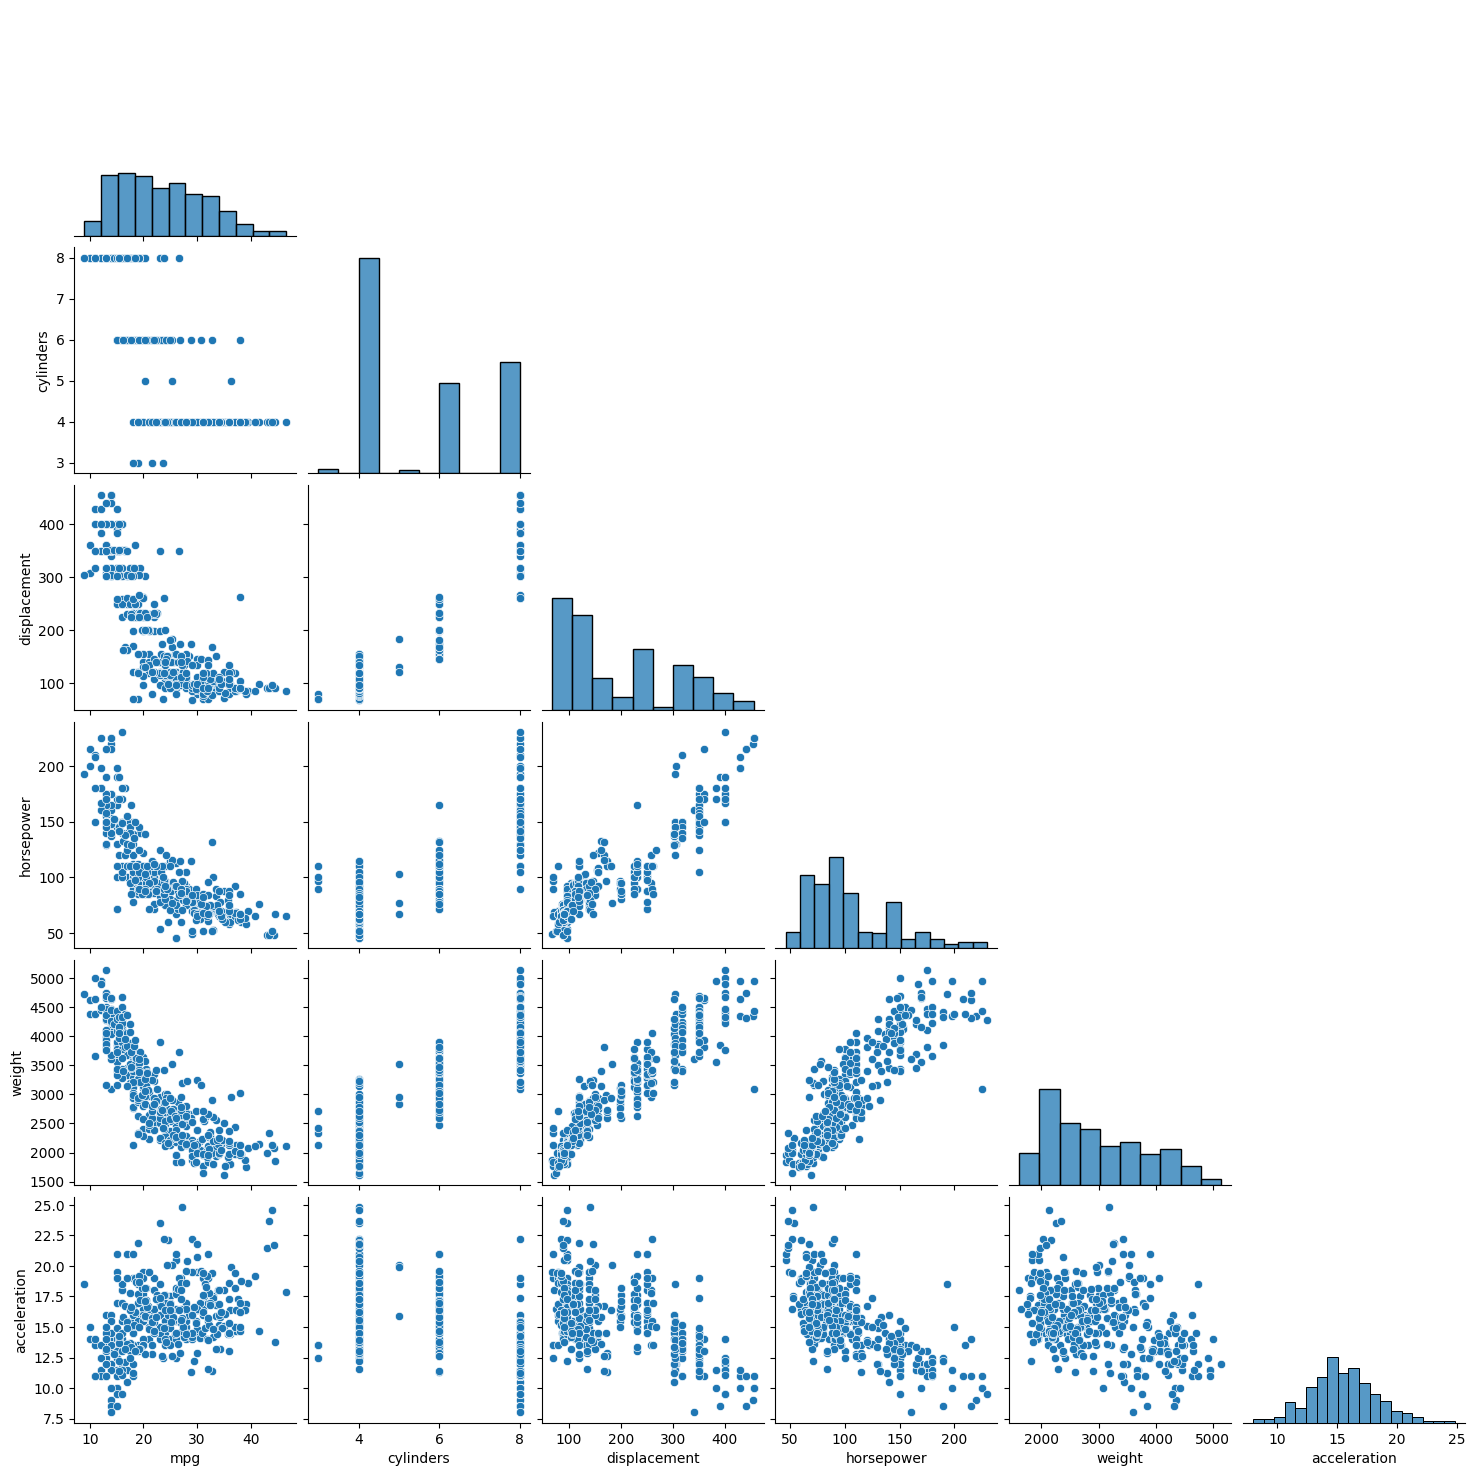

In [9]:
fig = sns.pairplot(mpg[['mpg','cylinders','displacement','horsepower','weight','acceleration']], corner=True)

### Correlation:
- Gör en korrelation för samma variabler som ovan, mha Seaborn. Avsikten är att undersöka om det finns features som sinsemellan har starkt samband.
- Slutsatsen är att flera features har en hög korrelation sinsemellan.
- 'mpg' har korrelation mot 'cylinders', 'displacement', 'horsepower' och 'weight'. Men 'horsepower' har också hög korrelation mot 'cylinders', 'displacement' och 'weight'.
- 'mpg' verkar ha störst inverkan från 'weight', som i sin tur är starkt korrelerad mot 'horsepower', 'cylinders' och 'displacement'.
- dvs man skulle kunna prova att göra en simpel linjär regression av 'mpg' mot 'weight'.

<Axes: >

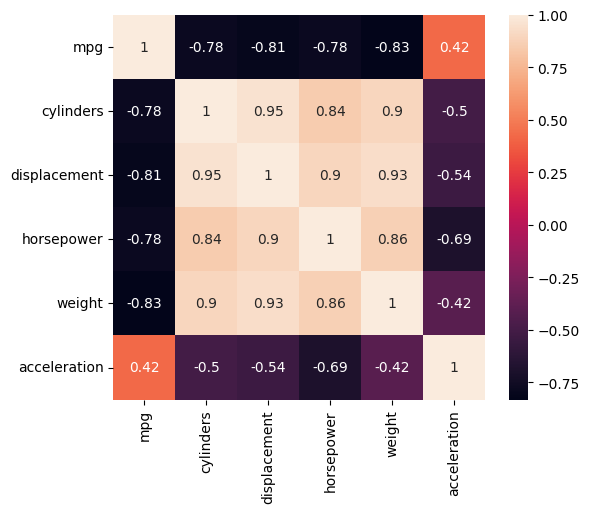

In [10]:
corr = mpg[['mpg','cylinders','displacement','horsepower','weight','acceleration']].corr()
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True)

## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

<details>

<summary>Answer</summary>

Do a manual calculation to check against the shapes after train|test split. 

</details>

---

[Länk till SciKit Learn train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)<br>
- Man ska ge funktionen X (feature matrisen) och y (target vektorn), så dessa måste definieras först.

In [11]:
# definierar en feature array (X) och en target vektor (y).
feat_array = ['cylinders','displacement','horsepower','weight','acceleration'] # lista med features som ska med i dataframen
target_vector = ['mpg']

In [12]:
#definierar X och y
def array_and_vector_creator(feat_array, target_vector=['mpg']):
    X, y = mpg[feat_array], mpg[target_vector]

    return X, y

X, y = array_and_vector_creator(feat_array, target_vector)

In [13]:
# printa lite information om feature matrisen och target vektorn
print(f'X columns: {X.columns}')
print(f'y name: {y.columns}')
print(f'X.head():\n {X.head()}')
print(f'y.head():\n {y.head()}')

X columns: Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')
y name: Index(['mpg'], dtype='object')
X.head():
    cylinders  displacement  horsepower  weight  acceleration
0          8         307.0       130.0    3504          12.0
1          8         350.0       165.0    3693          11.5
2          8         318.0       150.0    3436          11.0
3          8         304.0       150.0    3433          12.0
4          8         302.0       140.0    3449          10.5
y.head():
     mpg
0  18.0
1  15.0
2  18.0
3  16.0
4  17.0


In [14]:
# train test split av datan
def train_test_split_func(X_value, y_value, test_size, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X_value, y_value, test_size=0.2, random_state=42) # observera ordningen på de tilldelade variablerna

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_func(X, y, test_size=0.2, random_state=42)

In [ ]:
for var in [X_train, X_test,y_train, y_test]:
    print(f'Shape: {var.shape}') #kontrollerar att shape för alla variabler är ok

display(X.head(), y.head())

## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

<details>

<summary>Answer</summary>

MAE 2.50

MSE 10.50

RMSE 3.24

</details>

In [16]:
#tränar modellen
def model_fit_LinearRegression(X_value, y_value):
    model = LinearRegression()
    model.fit(X_value, y_value)
    return model

model = model_fit_LinearRegression(X, y)

In [17]:
print(model.coef_)
print(model.intercept_)

[[-3.97928359e-01 -8.31301222e-05 -4.52570802e-02 -5.18691735e-03
  -2.91047140e-02]]
[46.26430785]


In [18]:
def provide_stats(X_value, model):
    y_pred = model.predict(X_value) #predikterar y baserat på modellen och X_test
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

mae, mse , rmse = provide_stats(X_test, model)


In [19]:
def print_stats(mae, mse, rmse):
    print(f'MAE = {mae:.3f}')
    print(f'MSE = {mse:.3f}')
    print(f'RMSE = {rmse:.3f}')

print_stats(mae, mse, rmse)

MAE = 3.308
MSE = 16.795
RMSE = 4.098


In [32]:
def write_to_dataframe(method, feat_array, mae, mse, rmse, result_df):
    #list_to_add = [method, features, str(mae), str(mse), str(rmse)]
    result_to_add = pd.DataFrame([{'Method':method,'Features':feat_array,'MAE':mae,'MSE':mse,'RMSE':rmse}])
    out = pd.concat([result_df, result_to_add], ignore_index=True, copy=False)
    return out

Funktioner för att hantera result dataframen, spara data och läsa in data:

In [ ]:
# ta bort kolumner:
result.drop(columns=['Unnamed: 0'], inplace=True)
# result.head()
result

In [21]:
# skapar en dataframe, till vilken vi kan skriva resultaten (OBS, varje gång man kör denna cellen, skapas en ny dataframe och existerande data försvinner.)
#result = pd.DataFrame(columns=['Method','Features', 'MAE','MSE','RMSE'])
#result.head()

In [ ]:
# läs in sparad csv fil som result:
result = pd.read_csv('../saved/E01_result.csv')
result

In [65]:
# delete row(s) in result dataframe:
result.drop(index=[42], inplace=True) # list to contain index to be deleted
#result.reset_index(inplace=True)
#result.drop(columns=['index'])
result

,Method,Features,MAE,MSE,RMSE
0,LinearRegression,"['cylinders', 'displacement', 'horsepower', 'w...",3.486000,17.939000,4.235000
1,LinearRegression,"['displacement', 'horsepower', 'weight', 'acce...",3.510000,18.066000,4.250000
2,LinearRegression,"['horsepower', 'weight', 'acceleration']",3.506000,17.813000,4.221000
3,LinearRegression,"['weight', 'acceleration']",3.489000,17.657000,4.202000
4,LinearRegression,['acceleration'],5.193000,40.074000,6.330000
5,LinearRegression,['weight'],3.464000,17.693000,4.206000
6,LinearRegression,"['weight', 'horsepower']",3.506000,17.792000,4.218000
7,LinearRegression,"['weight', 'horsepower', 'displacement']",3.511000,18.014000,4.244000
8,LinearRegression,"['weight', 'horsepower', 'displacement', 'cyli...",3.488000,17.892000,4.230000
9,LinearRegression,['cylinders'],3.561000,21.814000,4.671000


In [58]:
# write result data frame to a .csv file
result.to_csv("../saved/E01_result.csv")

Steg 1: Linjär regression:
- Koden nedan anropar funktionerna i ordning och sparar resultatet i en dataframe för varje testad konfiguration.

In [ ]:
method_used = 'LinearRegression' # Ange vilken metod som används
feat_array = ['horsepower'] # ändra här vilka features som ska vara med i analysen. ['cylinders','displacement','horsepower','weight','acceleration']
X, y = array_and_vector_creator(feat_array, target_vector)
X_train, X_test, y_train, y_test = train_test_split_func(X, y, test_size=0.2, random_state=42)
model = model_fit_LinearRegression(X_train, y_train)
mae, mse , rmse = provide_stats(X_test, model)
#result = write_to_dataframe(method_used, feat_array, mae, mse, rmse, result)
display(result.head(40))

---
## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

<details>

<summary>Answer</summary>

|      |   Linear regr. SVD |   Linear regr. SVD scaled |   Linear regr. SGD |   Polynom. regr. deg 1 |   Polynom. regr. deg 2 |   Polynom. regr. deg 3 |
|:-----|-------------------:|--------------------------:|-------------------:|-----------------------:|-----------------------:|-----------------------:|
| mae  |            2.50386 |                   2.50386 |            2.53515 |                2.50386 |                1.98048 |                2.11788 |
| mse  |           10.5024  |                  10.5024  |           10.8908  |               10.5024  |                7.41986 |                9.27353 |
| rmse |            3.24074 |                   3.24074 |            3.30012 |                3.24074 |                2.72394 |                3.04525 |

</details>

---

Skalar X, för både träningsdatan och testdatan:<br>
[Länk till SciKit Learn MinMax_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale)

In [44]:
# funktion för att skala datan i feature matrisen.
from sklearn.preprocessing import MinMaxScaler

def scale_X(X_train_value, X_test_value):
    scaler = MinMaxScaler()
    scaler.fit(X_train_value)

    scaled_X_train = scaler.transform(X_train_value)
    scaled_X_test = scaler.transform(X_test_value)
    return scaled_X_train, scaled_X_test

scaled_X_train, scaled_X_test = scale_X(X_train, X_test)

#print(scaled_X_train)
print(f'{scaled_X_train.min():.2f} <= scaled_X_train <= {scaled_X_train.max():.2f}')
print(f'{scaled_X_test.min():.2f} <= scaled_X_train <= {scaled_X_test.max():.2f}')


0.00 <= scaled_X_train <= 1.00
0.00 <= scaled_X_train <= 0.97


Steg 2 Linear regression with scaled data:

In [ ]:
# stegar igenom alla funktionerna för att göra en linjär regression med skalad data:
method_used = 'LinearRegression w scaled data' # Ange vilken metod som används
feat_array = ['weight'] # ändra här vilka features som ska vara med i analysen.
X, y = array_and_vector_creator(feat_array, target_vector)
X_train, X_test, y_train, y_test = train_test_split_func(X, y, test_size=0.2, random_state=42)
scaled_X_train, scaled_X_test = scale_X(X_train, X_test)
model = model_fit_LinearRegression(scaled_X_train, y_train)
mae, mse , rmse = provide_stats(scaled_X_test, model)
result = write_to_dataframe(method_used, feat_array, mae, mse, rmse, result)
display(result.head(45))

Steg 3, Polynominal regression:

In [35]:
# funktion för att skapa en ny feature matris, som beror på vilken degree man väljer:

from sklearn.preprocessing import PolynomialFeatures

def feature_creation_polynomial(X_train, y_train, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X_train, y_train) # tränar inte modellen...
    return poly_features

poly_features = feature_creation_polynomial(X_train, y_train, 3)

display(model)

LinearRegression()

In [ ]:
# stegar igenom alla funktionerna för att göra en polynomial regression:
method_used = 'Polynomial regression 1 deg' # Ange vilken metod som används
feat_array = ['weight'] # ändra här vilka features som ska vara med i analysen.
X, y = array_and_vector_creator(feat_array, target_vector)
#scaled_X_train, scaled_X_test = scale_X(X_train, X_test)
poly_features = feature_creation_polynomial(X, y, degree=1)
X_train, X_test, y_train, y_test = train_test_split_func(poly_features, y, test_size=0.2, random_state=42)
model = model_fit_LinearRegression(X_train, y_train)
mae, mse , rmse = provide_stats(X_test, model)
result = write_to_dataframe(method_used, feat_array, mae, mse, rmse, result)
display(result.head(50))

Kommentar: Det är förväntat att en linjär regression, linjär regression med skalning och en polynomial regression med deg = 1 ska ge samma resultat map MAE, MSE, RMSE. Så förmodligen räknar det rätt.

Reproducerar grafen på sidan 99 i boken.
- Slutsats: baserat på mina beräkningar av koefficienterna och intercept kan jag få fram samma som i boken! Well done!

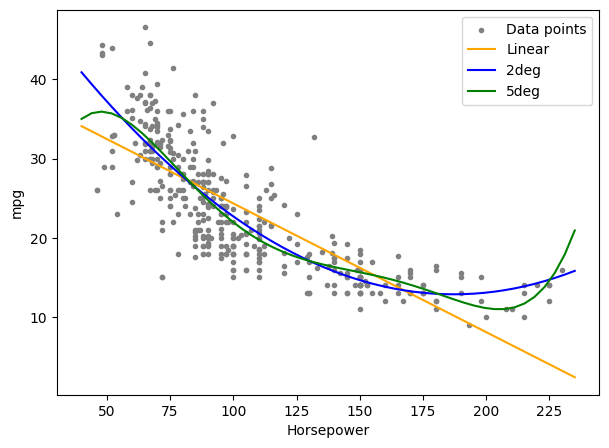

In [151]:
hp = mpg['horsepower']
x_vals = np.linspace(40, 235)
y_linear = -0.16259724 * x_vals + 40.6060976
y_2deg = -0.48445839*x_vals + 0.001294*x_vals**2 + 58.21294436
y_3deg = -6.11365869e-01*x_vals + 2.34566381e-03*x_vals**2 + -2.66743863e-06*x_vals**3 + 62.88482154
y_5deg = 3.67099931e+00*x_vals + -7.21169288e-02*x_vals**2 + 6.07240004e-04*x_vals**3 -2.36544467e-06*x_vals**4 + 3.49370615e-09*x_vals**5 -29.59874786

fig, ax = plt.subplots(figsize=(7,5)), plt.scatter(x=hp, y=y, marker='.', color='grey')
plt.plot(x_vals, y_linear, color="orange")
plt.plot(x_vals, y_2deg, color="blue")
#plt.plot(x_vals, y_3deg)
plt.plot(x_vals, y_5deg, color="green")
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.legend(["Data points","Linear", "2deg", "5deg"])


#deg1
#[[-0.16259724]]
#[40.6060976]

#deg2:
#[[-0.48445839  0.0012949 ]]
#[58.21294436]
#deg3:
#[[-6.11365869e-01  2.34566381e-03 -2.66743863e-06]]
#[62.88482154]
#deg5
#[[ 3.67099931e+00 -7.21169288e-02  6.07240004e-04 -2.36544467e-06
#   3.49370615e-09]]
#[-29.59874786]


## 4. Further explorations (**)

Feel free to further explore the dataset, for example you could choose to 
- drop different columns
- find out feature importance in polynomial models
- fine tune further for a specific model by exploring hyperparameters (check documentation which type of parameters that can be changed)

#### Ridge regression:
[Länk till dokumentation Ridge Regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

In [ ]:
# 'cylinders','displacement','horsepower','weight','acceleration'
alpha = 0.5
method_used = 'Ridge Regression, Alpha=0.5, scaled X' # Ange vilken metod som används
feat_array = ['cylinders','displacement','horsepower','weight','acceleration'] # ändra här vilka features som ska vara med i analysen.
X, y = array_and_vector_creator(feat_array, target_vector)
X_train, X_test, y_train, y_test = train_test_split_func(X, y, test_size=0.2, random_state=42)
scaled_X_train, scaled_X_test = scale_X(X_train, X_test)
model = Ridge(alpha)
model.fit(scaled_X_train, y_train)
mae, mse , rmse = provide_stats(scaled_X_test, model)
result = write_to_dataframe(method_used, feat_array, mae, mse, rmse, result)
display(result.head(50))


In [66]:
# Loopar igenom flera olika Aplpha. Alpha (Lambda) är en hyperparameter som ska tuneas.
Alpha = [.001, .01, .1, .25, .5, .75, .9, .95, .99]

for item in Alpha:
    method_used = f'Ridge Regression, Alpha={str(item)}, scaled X'
    feat_array = ['cylinders','displacement','horsepower','weight','acceleration'] # ändra här vilka features som ska vara med i analysen.
    X, y = array_and_vector_creator(feat_array, target_vector)
    X_train, X_test, y_train, y_test = train_test_split_func(X, y, test_size=0.2, random_state=42)
    scaled_X_train, scaled_X_test = scale_X(X_train, X_test)
    model = Ridge(item)
    model.fit(scaled_X_train, y_train)
    mae, mse , rmse = provide_stats(scaled_X_test, model)
    result = write_to_dataframe(method_used, feat_array, mae, mse, rmse, result)

result

,Method,Features,MAE,MSE,RMSE
0,LinearRegression,"['cylinders', 'displacement', 'horsepower', 'w...",3.486000,17.939000,4.235000
1,LinearRegression,"['displacement', 'horsepower', 'weight', 'acce...",3.510000,18.066000,4.250000
2,LinearRegression,"['horsepower', 'weight', 'acceleration']",3.506000,17.813000,4.221000
3,LinearRegression,"['weight', 'acceleration']",3.489000,17.657000,4.202000
4,LinearRegression,['acceleration'],5.193000,40.074000,6.330000
5,LinearRegression,['weight'],3.464000,17.693000,4.206000
6,LinearRegression,"['weight', 'horsepower']",3.506000,17.792000,4.218000
7,LinearRegression,"['weight', 'horsepower', 'displacement']",3.511000,18.014000,4.244000
8,LinearRegression,"['weight', 'horsepower', 'displacement', 'cyli...",3.488000,17.892000,4.230000
9,LinearRegression,['cylinders'],3.561000,21.814000,4.671000


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---